In [1]:
import mysql.connector
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.animation as animation
#connect to mysql server with database baby_names
cnx = mysql.connector.connect(user='python', database='baby_names')
#create mysql cursor object
cur = cnx.cursor()

created frequencies list.
created initial bar graph
Animating...


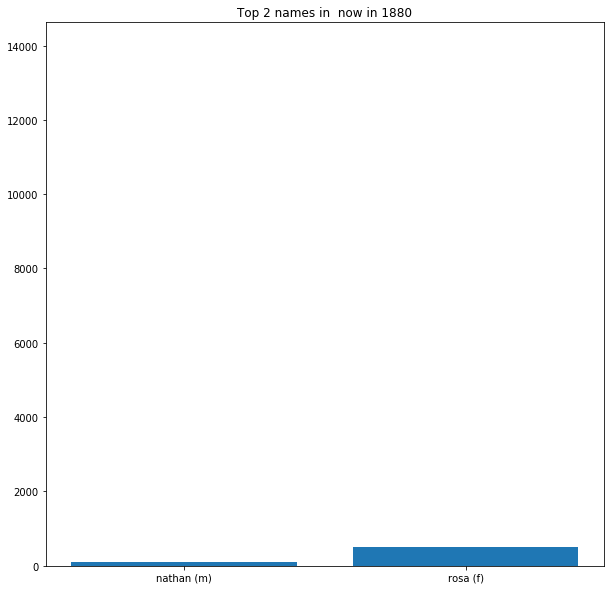

In [10]:
#animation program taking input a list of names and genders--output gif of those names over time
names = [('nathan','m'),('rosa','f')]
name_range = len(names)
#starting year
#start_name_year = 1902
start_year = 1880
end_year = 2018
num_frames = end_year - start_year + 1
#create frequencies as empty dictionary 
frequencies = {}
#frequencies[name][year] will by the number of people with name name in year year
for name in names:
    #new dictionary for each name
    frequencies[name[0]] = {}
    #query for the frequency data for all years
    query = "select frequency, year from baby where name = '"+ name[0] + "' and sex = '"+ name[1]+"' and year between "+str(start_year)+" and " +str(end_year)+";"
    cur.execute(query)
    #define the dictionary entry
    for frequency, year in cur.fetchall():
        frequencies[name[0]][year]=frequency
print("created frequencies list.")

#make a figure for the graph to go on 
fig=plt.figure(figsize = (10,10))

#list of numbers from 1 to the name range
#make tick marks labeled by the names
x_data = range(1,name_range+1)
plt.xticks(x_data, [str(name[0])+" ("+str(name[1])+")" for name in names])
#plot frequency list in start year 1880
# the [frequencies[name[0]].get(1880,0) for name in names] lists 0 if 1880 is not in the dictionary 
# frequencies[name[0]]
barcollection = plt.bar(x_data,[frequencies[name[0]].get(1880,0) for name in names])
#find the maximum frequency of all the data
max_pop = max([max(frequencies[name[0]].values()) for name in names])
#set the y-axis to be the maximum height
plt.ylim(top=max_pop)
print("created initial bar graph")
def animate(n):
    #pause at end of animation
    if n > num_frames-1:
        n = num_frames-1
    #name frequencies in year 1880+n as a list
    y_data = [frequencies[name[0]].get(1880+n,0) for name in names]
    #adjust the title to reflect current year
    plt.title("Top "+str(name_range)+" names in "+ " now in "+str(start_year+n))
    #adjust bar heights
    for i, b in enumerate(barcollection):
        b.set_height(y_data[i])
print("Animating...")
#make the animation
anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=num_frames+20,
                             interval=200)
#save the animation
anim.save('sibling_gif.gif',writer='imagemagick')
#plt.show()

<img src = 'housemate_gif.gif'>

<img src = 'sibling_gif.gif'>

![my_image](housemate_gif.gif)

![my_image](sibling_gif.gif)